**Supervised Learning** is a type of machine learning where the model is trained using labeled data. In other words, the correct answer (the label) is provided during the training phase. Once the model has been trained, it can be used to predict the output for new, unseen data. Common use cases include image classification, email spam detection, and predictive modeling in various fields like healthcare, finance, and marketing.

There are various algorithms used in Supervised Learning, a few examples include:

**Linear Regression:** Used when the target variable is continuous. Example: Predicting house prices.

**Logistic Regression:** Used when the target variable is categorical. Example: Predicting if an email is spam or not.

**Decision Trees:** Can be used for both regression and classification tasks. Example: Predicting whether a loan should be given to an individual.

### **Model Evaluation Techniques**

In supervised learning, evaluating the performance of a model is crucial. Here are some techniques:

**Confusion Matrix:** It is a tabular representation of Actual vs Predicted values.

**Accuracy:** It is the ratio of correct predictions to the total predictions made.

**Precision:** It represents the accuracy of positive predictions.

**Recall (Sensitivity):** It represents the proportion of actual positives that are correctly identified as such.

**F1-Score:** It is the harmonic mean of Precision and Recall, useful when the data has imbalanced classes.

**ROC (Receiver Operating Characteristic)** curve visualizes the performance of a binary classifier, and AUC (Area Under Curve) measures the area underneath the ROC curve.

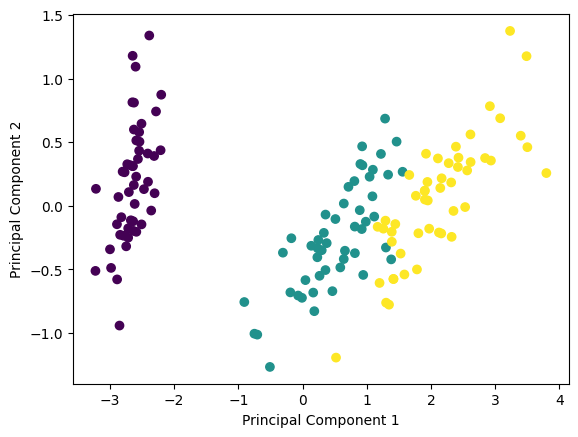

In [ ]:
# Importing Required Libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Iris Dataset
iris = load_iris()
X = iris.data

# Initialize PCA
pca = PCA(n_components=2)  # We want to reduce to 2 components

# Fit and Transform The Data
X_transformed = pca.fit_transform(X)

# X_transformed now holds the transformed data (from 4 dimensions to 2)

# Plotting The Data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


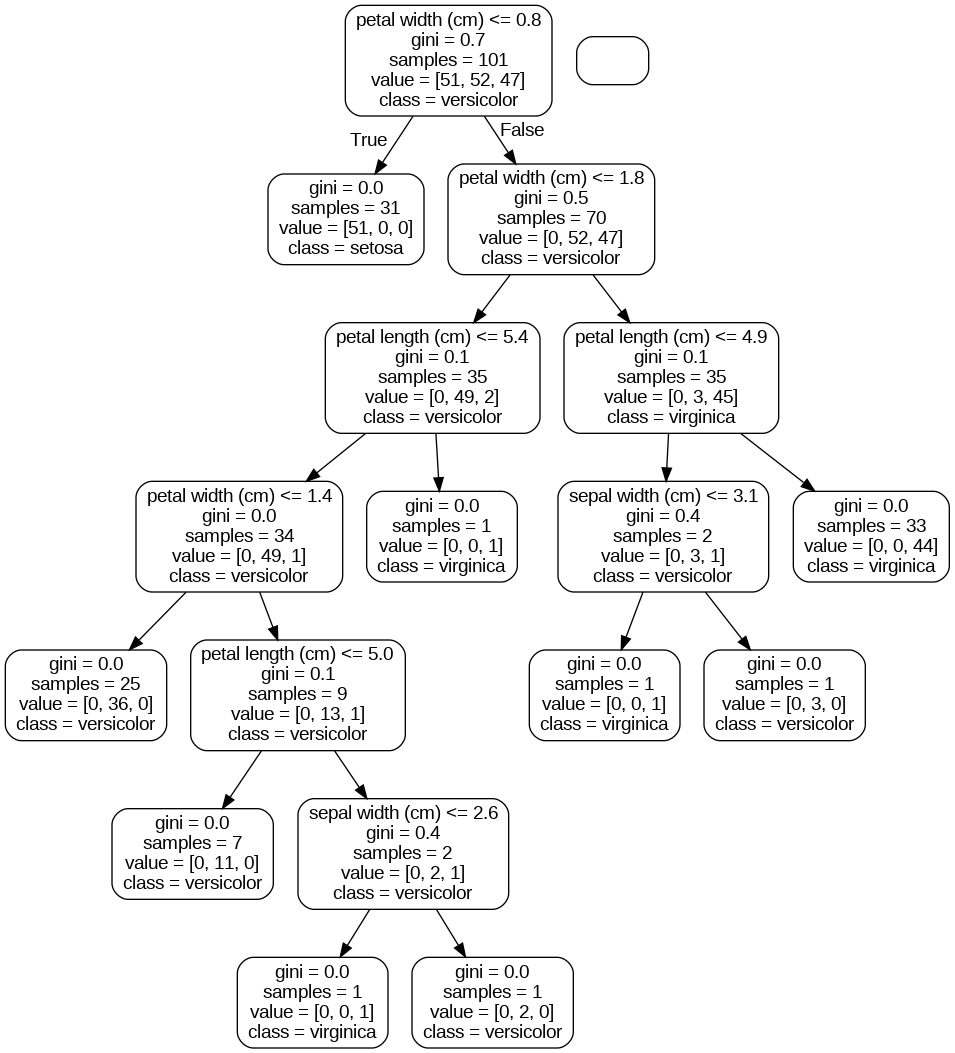

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot

# Load iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X, y)

# Select one tree from the forest
tree = clf.estimators_[0]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = iris.feature_names, class_names = iris.target_names,
                rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

from IPython.display import Image
Image(graph.create_png())


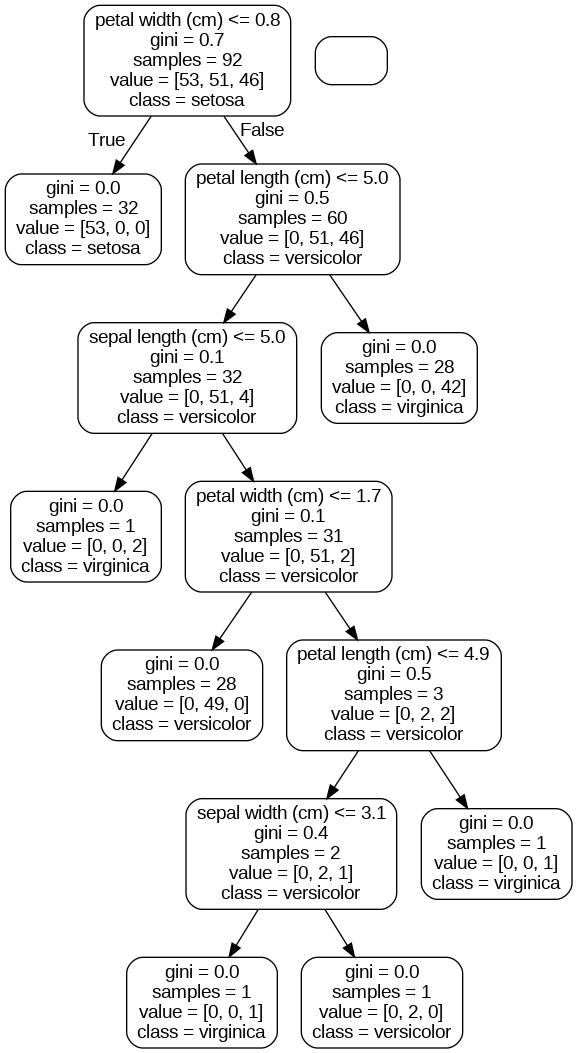

In [ ]:
from IPython.display import Image
Image(graph.create_png())

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score,f1_score,roc_curve

In [ ]:
"""
from google.colab import files
uploaded = files.upload()

import io

df = pd.read_csv('creditcard.csv')
"""

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:

df.info()

print('\n')

df.describe()

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#imputation with mean

df['Amount'].fillna(df['Amount'].mean(), inplace=True)

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
from sklearn import preprocessing


In [ ]:
df.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [ ]:
#calculating the % of each class dist, to check for imbalance

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


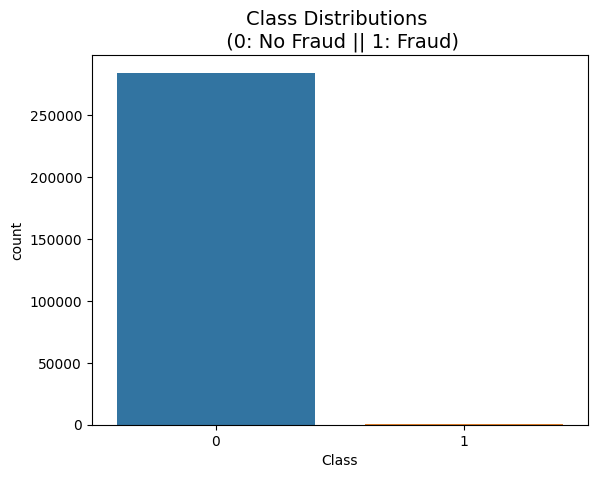

In [ ]:
#visualize distrubution of classes
#heavily imbalanced, will cause overfitting
#creat subsamples with 50/50 ratio

sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

(0.0, 172792.0)

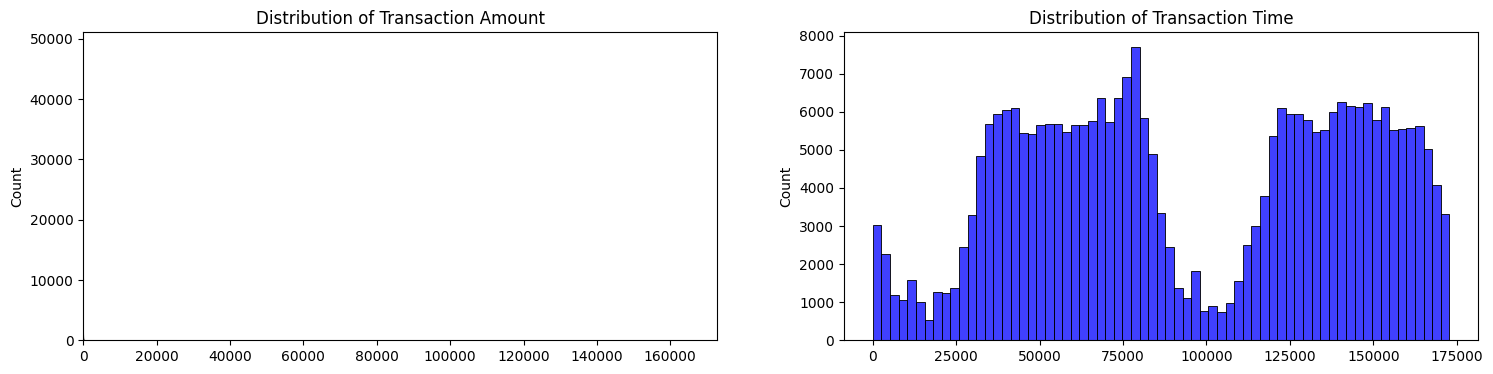

In [ ]:
#checking distribution of transaction amounts/time
import numpy as np
fig, ax = plt.subplots(1,2, figsize=(18,4))

#Making dataframe arrays/converting the values into a numpy array
amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount')

#his sets the limits of the x-axis on the first subplot
#to range from the minimum to the maximum value in the amount_val array.
ax[0].set_xlim([min(amount_val), max(amount_val)])


sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time')

#his sets the limits of the x-axis on the first subplot
#to range from the minimum to the maximum value in the amount_val array.
ax[0].set_xlim([min(time_val), max(time_val)])

In [ ]:
#scaling columns(Amount/Time)

from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler() #less prone to outliers

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

#axis=1 specifies that you want to drop columns.
#If you wanted to drop rows, you would use axis=0

df.drop(['Time', 'Amount'], axis=1, inplace=True)


In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727,0.927124,0.118914
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,3.495006,0.557903
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-0.307413,-0.994983
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-0.229162,-0.358210
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,0.770838,0.641790
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,358.683155,1.035022


In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
#check count

print('No Frauds',df['Class'].value_counts()[0], ' of the dataset')
print('Frauds', df['Class'].value_counts()[1] , ' of the dataset')

No Frauds 284315  of the dataset
Frauds 492  of the dataset


In [ ]:
#handle imbalance, undersampling
#shuffle dataset
shuffled_df = df.sample(frac=1, random_state=4)

#separate all fraud class in a separate dataset
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

#random select 492 observations from non-fraud(majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492, random_state=42)

#concatenate both frames again
normalized_df = pd.concat([fraud_df, non_fraud_df])

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
#check count

print('No Frauds is',normalized_df['Class'].value_counts()[0], ' of the dataset')
print('Frauds is', normalized_df['Class'].value_counts()[1] , ' of the dataset')

No Frauds is 492  of the dataset
Frauds is 492  of the dataset


In [ ]:
#create feature and target arrays
X = normalized_df.drop('Class', axis=1)
y= normalized_df['Class']

#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
#train model

model= RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#predict test

y_pred = model.predict(X_test)

#evaluate model

print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       154
           1       0.95      0.91      0.93       142

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [ ]:
#, confusion_matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion_matrix:\n', conf_mat)

Confusion_matrix:
 [[147   7]
 [ 13 129]]


In [ ]:
#plot matrix, ROC curve

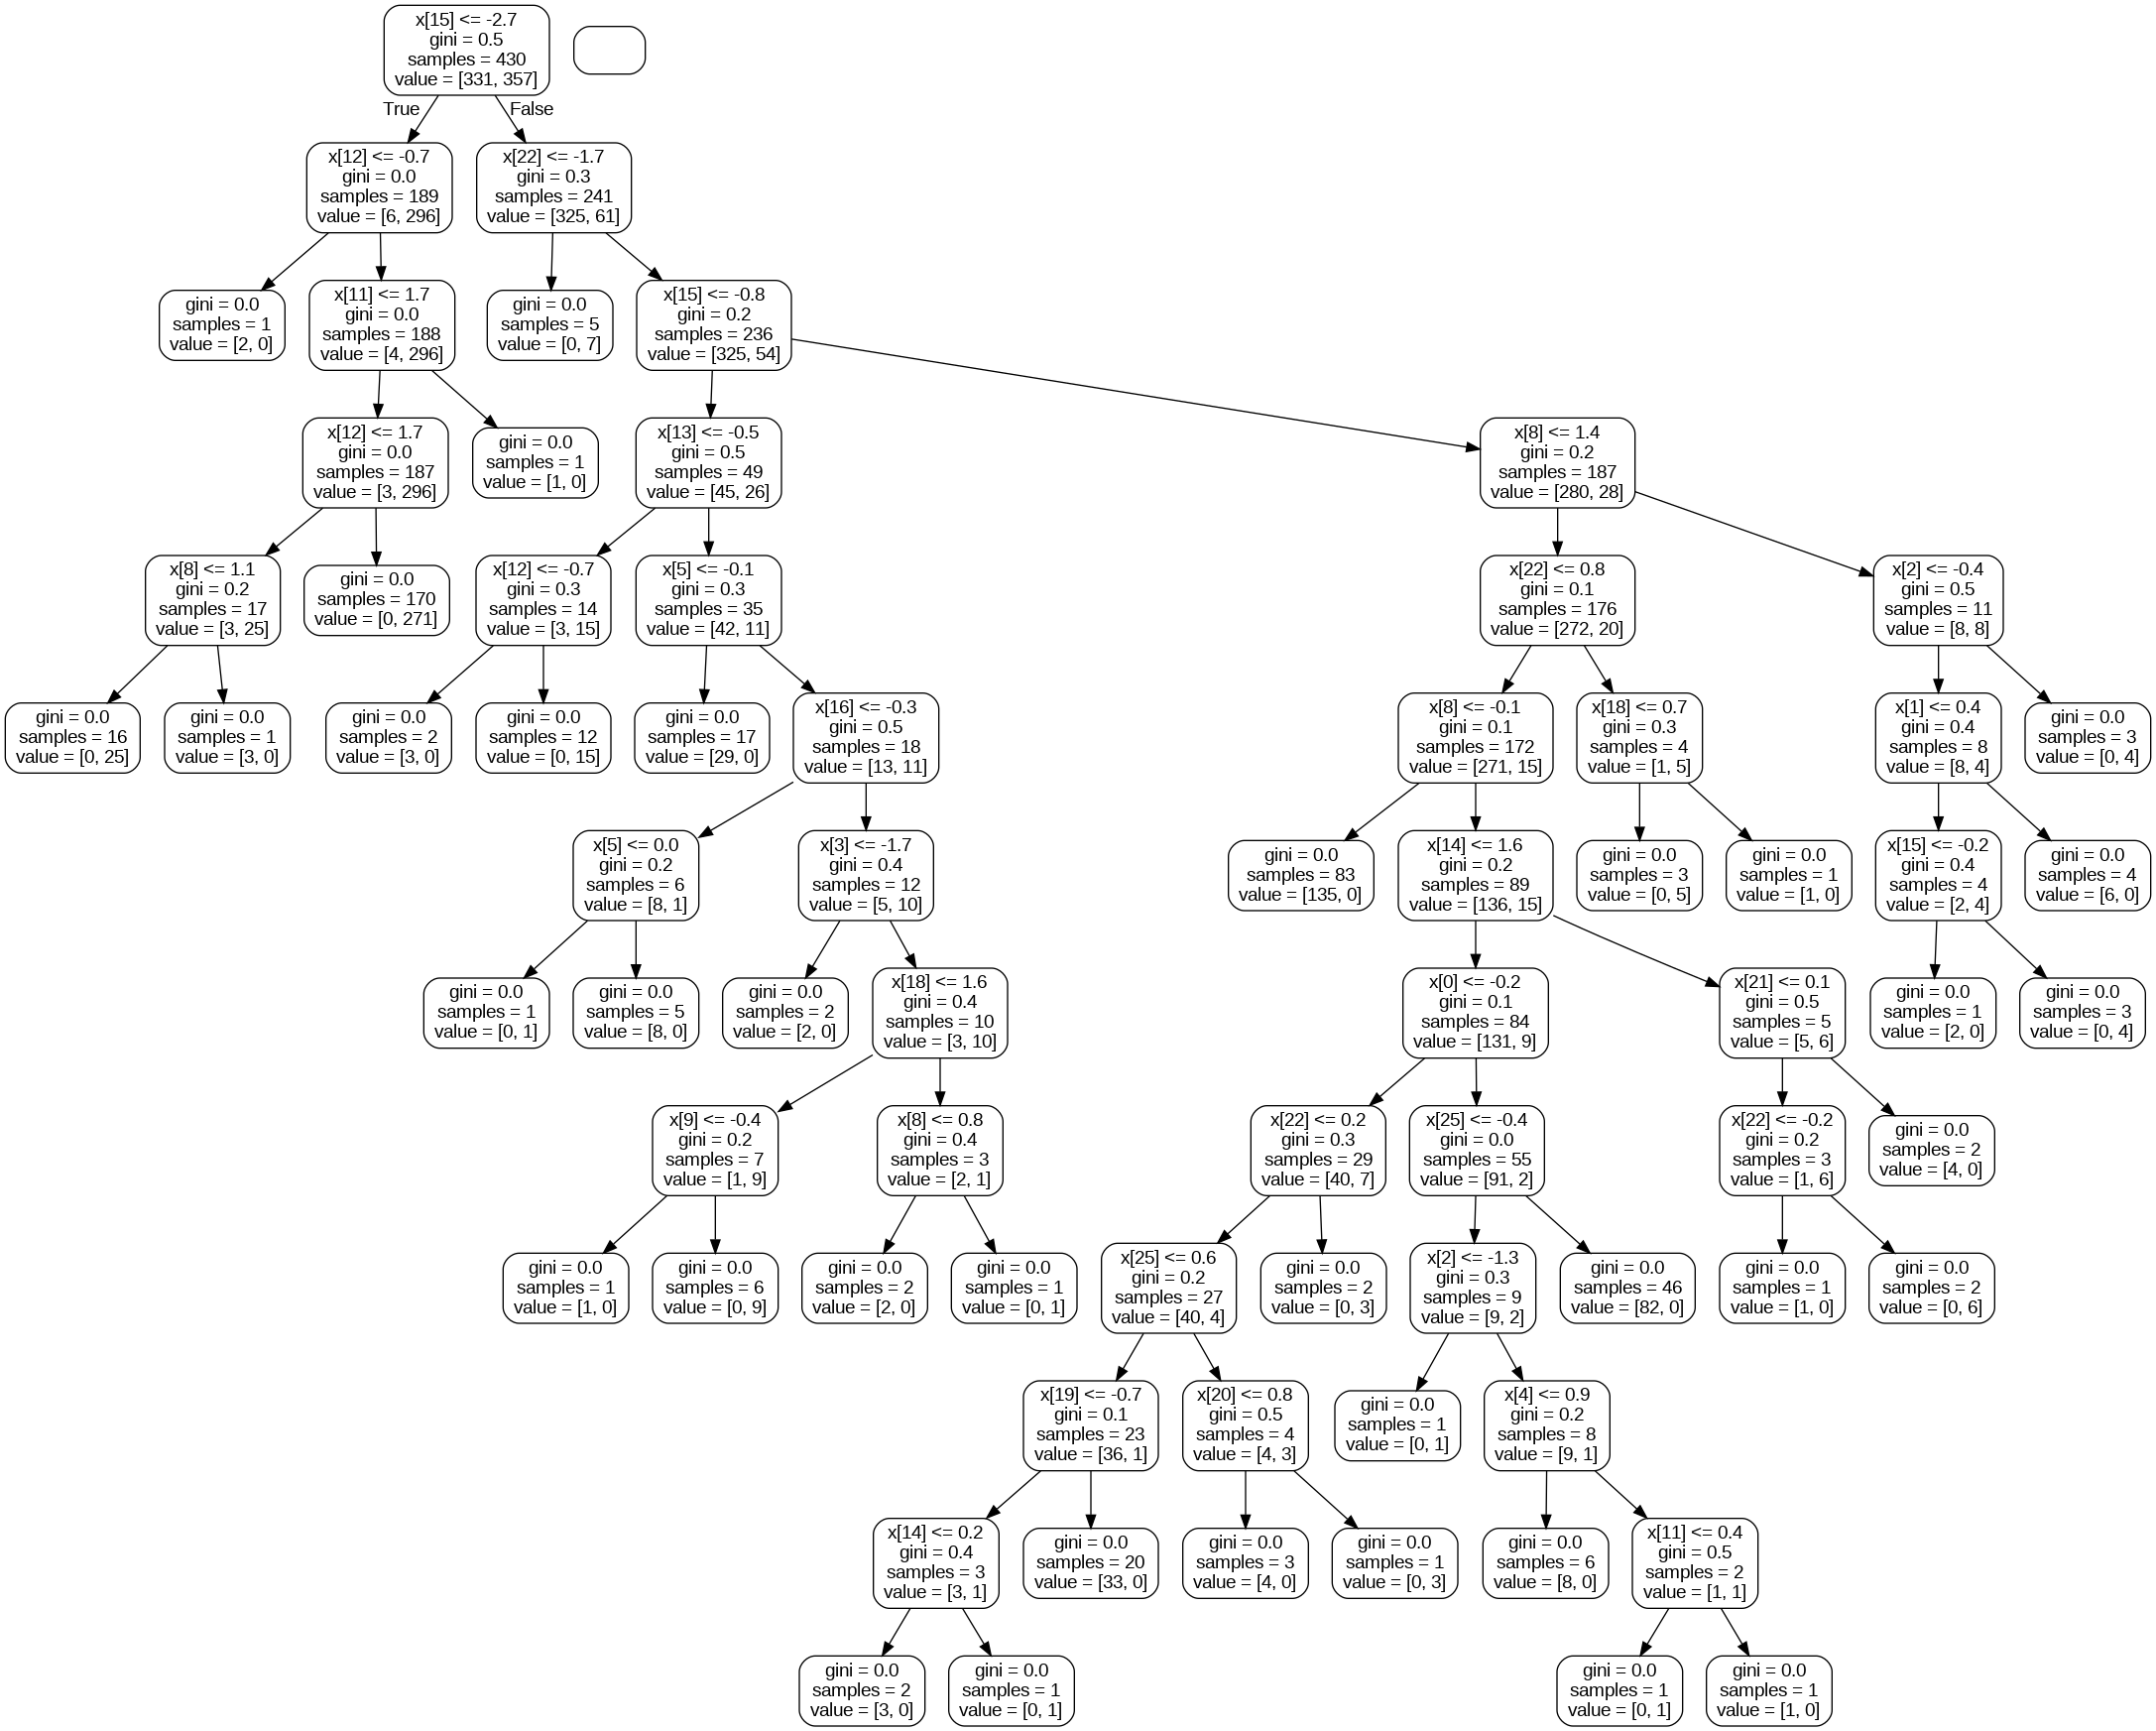

In [ ]:
#visualize tree
# Select one tree from the forest
tree = model.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot',
                rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

from IPython.display import Image
Image(graph.create_png())

In [ ]:
#hyperparameter tuning and cross validation
"""
n_estimators: The number of trees in the forest.
max_depth: The maximum depth of the tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
"""

from sklearn.model_selection import GridSearchCV

#Define parameter grid

param_grid = {
    'n_estimators' : [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#initialize model
model = RandomForestClassifier(random_state=42)

#initialize gridsearch

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#fit gridsearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [ ]:
#best parameters
print('Best parameters:', grid_search.best_params_)

print('Best score:', grid_search.best_score_)

best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.9302761028245001


In [ ]:
# Predict test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       154
           1       0.94      0.91      0.92       142

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Confusion matrix:
 [[146   8]
 [ 13 129]]


True Positives: Correctly Classified Fraud Transactions

False Positives: Incorrectly Classified Fraud Transactions

True Negative: Correctly Classified Non-Fraud Transactions

False Negative: Incorrectly Classified Non-Fraud Transactions

Precision: True Positives/(True Positives + False Positives)

Recall: True Positives/(True Positives + False Negatives)

Precision says how sure our model is in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.

Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

In [ ]:
#Oversampling using SMOTE

from imblearn.over_sampling import SMOTE
import numpy as np

#instantiate
smote = SMOTE(random_state=42)

#apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#count of each class

print(np.bincount(y_train_resampled))


[350 350]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
clf = RandomForestClassifier(random_state=1)

# Train the model
clf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=1)

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
print(f"RF train accuracy: {clf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {clf.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.929


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       154
           1       0.95      0.90      0.92       142

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

[[147   7]
 [ 14 128]]
Accuracy:  0.9290540540540541


Text(50.722222222222214, 0.5, 'Actual')

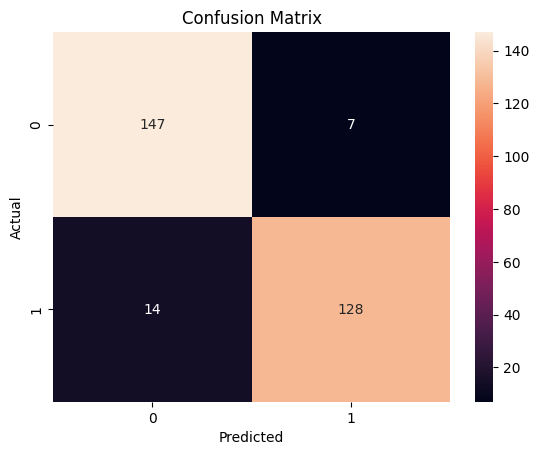

In [ ]:
sns.heatmap(conf_matrix, fmt=".0f", annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **Option 2**

In [ ]:
print('Classification report: \n', classification_report(y_test, y_pred))

print('\n')

print('Accuracy: ', accuracy_score(y_test, y_pred))

print('\n')

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()


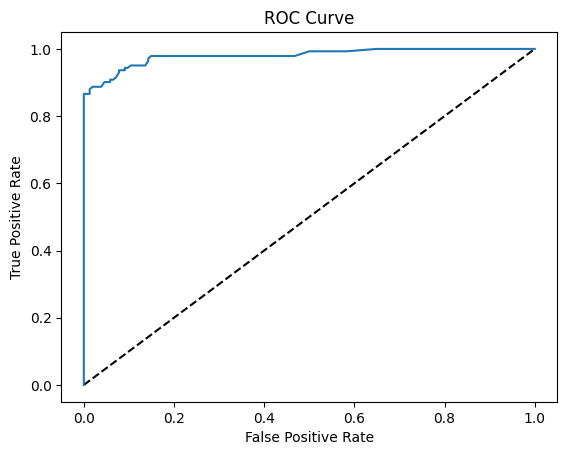

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# **Option 2**

In [ ]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_prob)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

print('\n')

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
